# Loading Data..

In [10]:
import pandas as pd

speech = pd.read_csv('3.csv')
emotiono = pd.read_csv('emotion.csv')
gaze = pd.read_csv('gaze.csv')


# Analyzing the Speech Dataset


## Descriptive Statistics

The Three most Dominant emotions are:
hesitant:  0.60
confident:  0.57
positive:  0.57


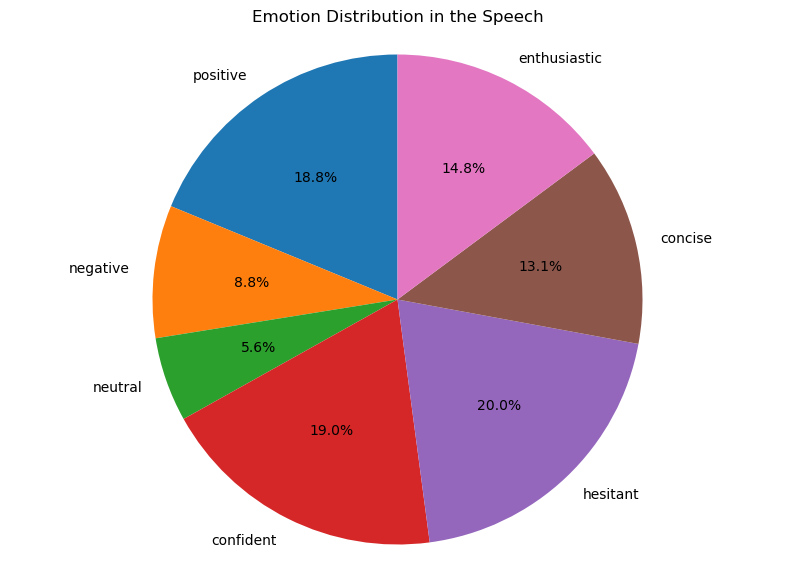

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

emotions = speech.columns[10:-1]
avg = speech[emotions].mean()

top3 = avg.sort_values(ascending = False).head(3)
print('The Three most Dominant emotions are:')
for emo , val in top3.items():
    print(f"{emo}: {val: .2f}")
    

plt.figure(figsize = (10 , 7))
plt.pie(avg , labels = avg.index , autopct ='%1.1f%%' , startangle = 90)
plt.title('Emotion Distribution in the Speech')
plt.axis('equal')
plt.show()

We can see the Three most dominant emotions depicted by the person.

## Trend Analysis

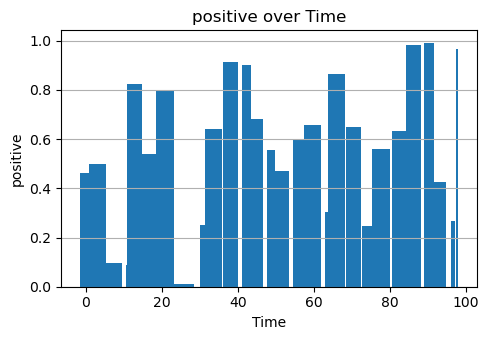

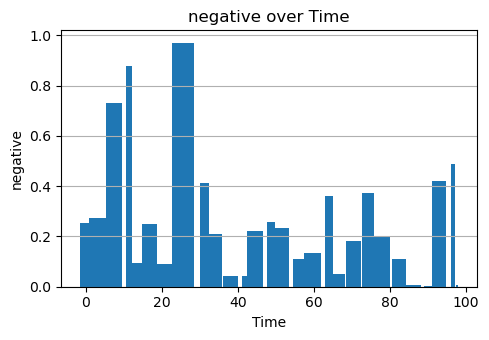

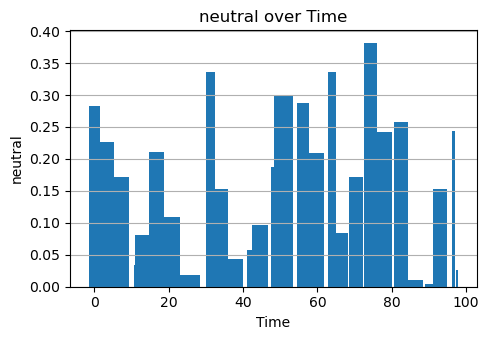

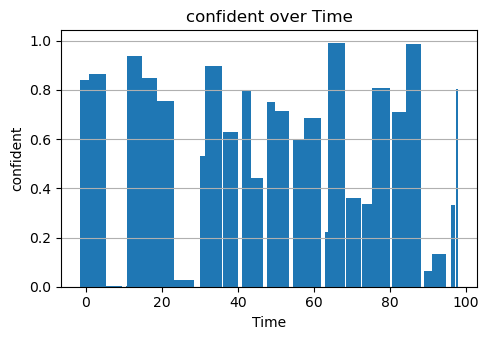

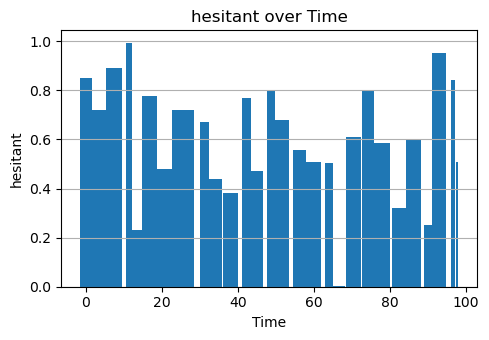

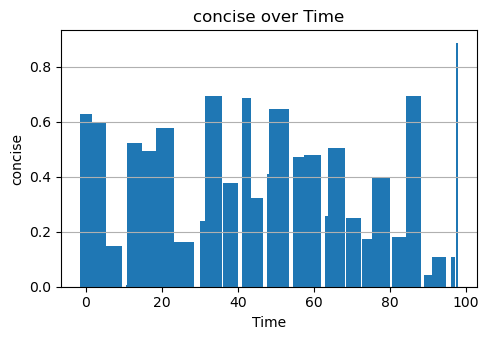

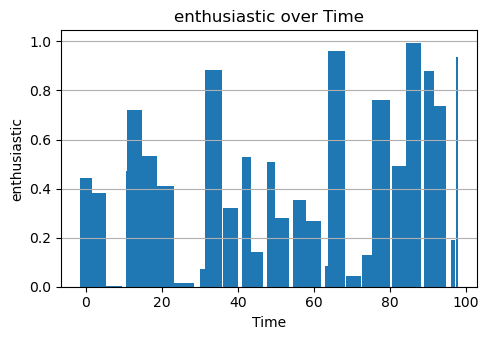

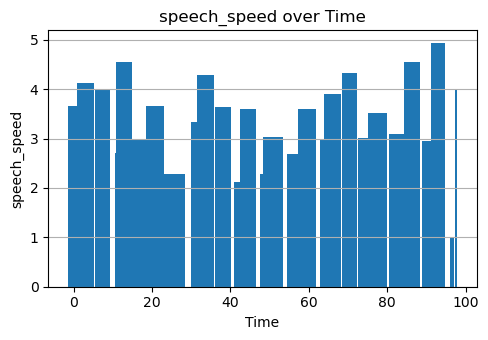

In [12]:

columns = speech.columns[10:]
for column in columns :
    plt.figure(figsize = (5 , 3.5))
    plt.bar(speech['start'] , speech[column] , width = (speech['end'] - speech['start']))
    
    plt.title(f'{column} over Time')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.grid(axis = 'y')
    plt.tight_layout()
    plt.show()

INFERENCES BASED ON THE ABOVE GRAPHS:

1. Person3's tone is generally positive, but there is a slight dip in graph when he discusses challenges living alone during his MBA and his online college experience.

2. There is a dip in confidence graph when he talks about living alone during his MBA and affect of Covid-19 in his college life.

3. Hesistant being the most dominant emotion has high bars throughout the transcript.

4. Overall less conciseness is observed in the speech with several dips in the graph occuring frequently.

5. The person seems less enthusiastic talking about his life in Varanasi as can be observed by continuous less values in Enthusiastic graph during that period.

6. The person also seems less enthusiastic talking about his extracurricular activities like playing guitar and how he learned it online.



## Correlation Analysis

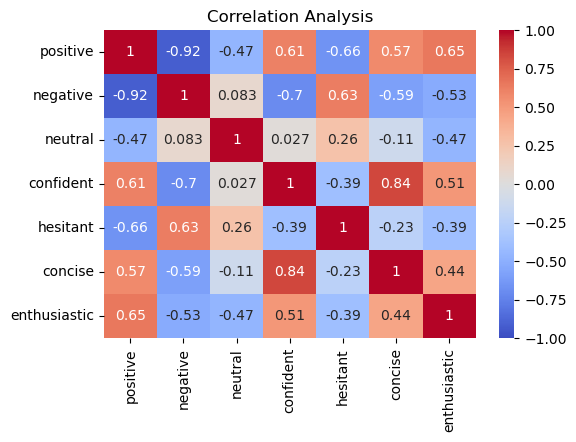

In [13]:
import seaborn as sns
selected = speech.columns[10:-1]
df = speech[selected]
corr = df.corr()

plt.figure(figsize = (6 , 4))
sns.heatmap(corr , annot = True , cmap = 'coolwarm' , vmin = -1 , vmax = 1)
plt.title("Correlation Analysis")
plt.show()

This heat map gives the correlation between emotions where strong correalations are generally (> 0.75 or < -0.75) and these strong correlations can be used to make inferences

# Analyzing the Emotion Dataset

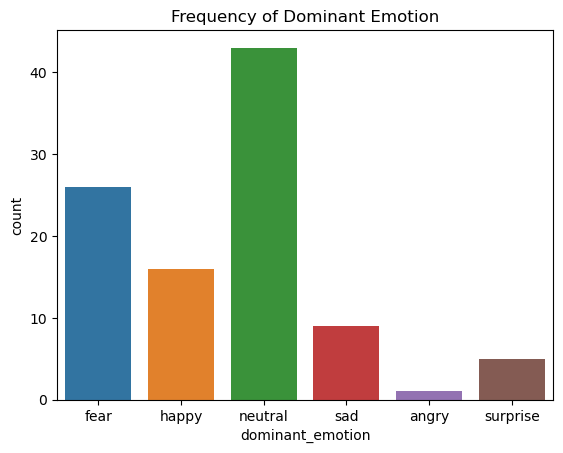

The most dominant emotion is 'neutral' with a count of 43.


In [14]:
sns.countplot(data = emotiono , x = 'dominant_emotion')
plt.title('Frequency of Dominant Emotion')
plt.show()

emotion_counts = emotiono['dominant_emotion'].value_counts()
max_emotion = emotion_counts.idxmax()
max_count = emotion_counts.max()

print(f"The most dominant emotion is '{max_emotion}' with a count of {max_count}.")

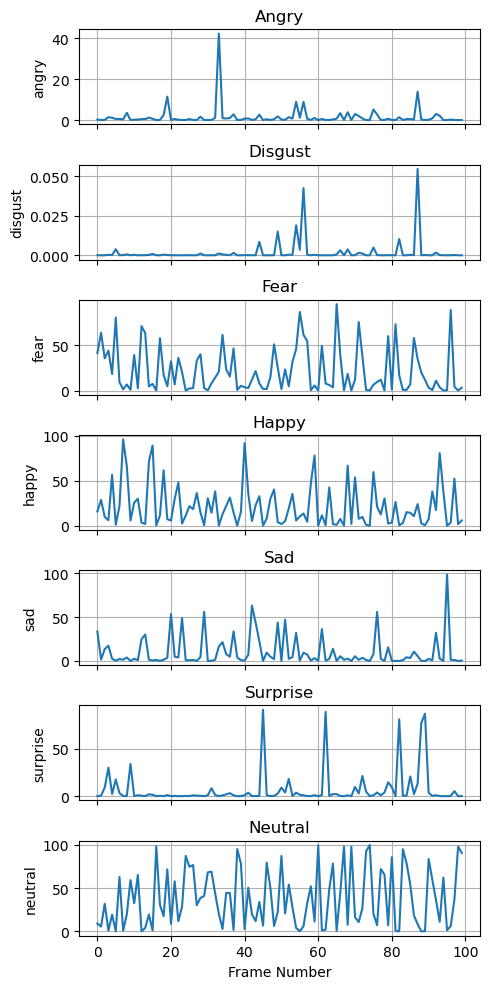

In [15]:
emotion_columns = emotiono.columns[2:-1]
fig, axes = plt.subplots(nrows=len(emotion_columns), figsize=(5 , 10), sharex=True)

x_range = range(len(emotiono))

for ax, emotion_col in zip(axes, emotion_columns):
    ax.plot(x_range, emotiono[emotion_col], label=emotion_col)
    ax.set_ylabel(emotion_col)
    ax.grid(True)
    ax.set_title(emotion_col.capitalize())

plt.xlabel('Frame Number')
plt.tight_layout()
plt.show()

Analyzing the emotional graphs of the candidate's speech, I noted patterns in 'neutral', 'happy', and 'fear' emotions. The neutral tone suggests objective delivery, interspersed with moments of enthusiasm indicated by 'happy' spikes. Occasional 'fear' peaks might represent challenges or vulnerability. 

## Analyzing the Gaze Dataset


In [16]:
print(f"Percentage of frames with eye contact: {gaze['gaze'].mean() * 100:.2f}%")
print(f"Percentage of frames with blinks: {gaze['blink'].mean() * 100:.2f}%")

Percentage of frames with eye contact: 45.00%
Percentage of frames with blinks: 7.00%


Given that the speaker maintains eye contact in 45% of the frames, it indicates a moderate level of audience engagement. The 7% blink rate might hint at occasional nervousness or reflection. The varied gaze suggests moments of introspection or emphasis on particular topics.

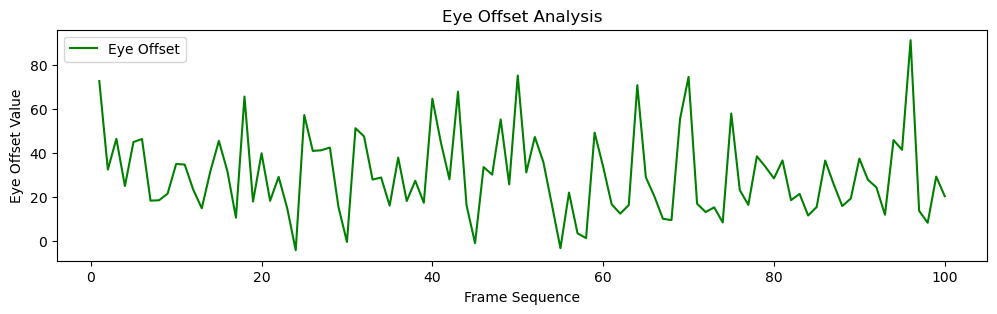

In [17]:
plt.figure(figsize=(12,3))
plt.plot(gaze['image_seq'], gaze['eye_offset'], label='Eye Offset', color='green')
plt.xlabel('Frame Sequence')
plt.ylabel('Eye Offset Value')
plt.title('Eye Offset Analysis')
plt.legend()
plt.show()

The occasional and less pronounced peaks in the eye_offset graph suggest that the candidate largely maintains a steady gaze, but with occasional deviations. These variations might be due to referencing materials, emphasizing particular topics, moments of contemplation, or external distractions. While the speaker's overall demeanor seems focused, these deviations might also hint at instances of recalling specifics or, in some scenarios, a fleeting lack of confidence

# Overall Summary

Person3's talk is marked by hesitancy, though confidence and positivity are close runners-up. He's mostly positive but gets less upbeat discussing challenges like living alone during his MBA and the pandemic's college impact. The speech occasionally lacks focus, and enthusiasm drops when he chats about Varanasi and hobbies like guitar. While the main mood is 'neutral', there are hints of happiness and vulnerability. His eye movement is generally steady, but there are moments of diversion, indicating brief reflection or uncertainty